In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)
import IPython.display as display
import matplotlib.pyplot as plt
import random
import time
import pathlib
from sklearn.model_selection import train_test_split

TensorFlow 2.x selected.
2.0.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data_root = pathlib.Path('/content/drive/My Drive/Smash_Bros_Master/_playground/')
print(data_root)
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths if str(path).lower().endswith("jpg")]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

/content/drive/My Drive/Smash_Bros_Master/_playground


19600

In [4]:
all_image_paths[:5]

['/content/drive/My Drive/Smash_Bros_Master/_playground/space_with_star/Plup_vs_Zain-MeleeSingles_ GroupB-SmashSummit_5534.jpg',
 '/content/drive/My Drive/Smash_Bros_Master/_playground/space_with_star/Plup_vs_Zain-MeleeSingles_ GroupB-SmashSummit_4298.jpg',
 '/content/drive/My Drive/Smash_Bros_Master/_playground/pokemon_gym/TBH8 SSBM - TSM _ Leffen (Fox) Vs_5875.jpg',
 '/content/drive/My Drive/Smash_Bros_Master/_playground/forest/Plup_vs_Zain-MeleeSingles_ GroupB-SmashSummit_7852.jpg',
 '/content/drive/My Drive/Smash_Bros_Master/_playground/fountain_of_dream/Evo_2014_One_minute_kill_513.jpg']

In [5]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
print(label_names)
label_to_index = dict((name, index) for index, name in enumerate(label_names))
print(label_to_index)
all_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 20 labels indices: ", all_labels[:20])

['forest', 'fountain_of_dream', 'no_gaming', 'pokemon_gym', 'space', 'space_with_star']
{'forest': 0, 'fountain_of_dream': 1, 'no_gaming': 2, 'pokemon_gym': 3, 'space': 4, 'space_with_star': 5}
First 20 labels indices:  [5, 5, 3, 0, 1, 3, 4, 3, 2, 5, 3, 3, 5, 5, 4, 2, 4, 4, 0, 4]


In [0]:
# separate dataset
train_paths, test_paths, train_labels, test_labels = train_test_split(all_image_paths, all_labels) 

In [9]:
IMG_SIZE = 192
# decode images
img_raw = tf.io.read_file(train_paths[0])
print(repr(img_raw)[:100]+"...")

img_tensor = tf.image.decode_image(img_raw)
print(img_tensor.shape)
print(img_tensor.dtype)

img_final = tf.image.resize(img_tensor, [IMG_SIZE, IMG_SIZE])
img_final = img_final / 255.0 # normalize pixel values
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

<tf.Tensor: id=33, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\...
(720, 1280, 3)
<dtype: 'uint8'>
(192, 192, 3)
0.0
1.0


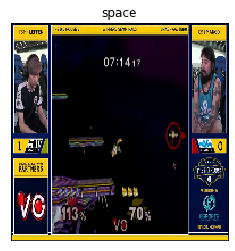

In [10]:
def load_and_preprocess_image(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
  img /= 255.0  # normalize to [0,1] range
  return img


def show(img, label):
  plt.imshow(img)
  plt.title(label)
  plt.xticks([])
  plt.yticks([])
  print()

img_path = train_paths[0]
img = load_and_preprocess_image(img_path)
label = label_names[train_labels[0]]
show(img, label)

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32
IMG_SIZE = 192
SHUFFLE_SIZE = 1000

# a dataset that returns image paths
path_ds = tf.data.Dataset.from_tensor_slices(train_paths)
for n, img_path in enumerate(path_ds.take(4)):
  print(n, img_path)

# a dataset that returns images (loaded off disk, decoded, and preprocessed)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
for n, image in enumerate(image_ds.take(4)):
  print(n, image.shape)
  
# a dataset that returns labels
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(train_labels, tf.int64))
for label in label_ds.take(4):
  print(label_names[label.numpy()])
  
# a dataset that returns images and labels
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
print(image_label_ds)


for img, label in image_label_ds.take(2):
  print(img.shape, label_names[label.numpy()])

0 tf.Tensor(b'/content/drive/My Drive/Smash_Bros_Master/_playground/space/TBH8 SSBM - TSM _ Leffen (Fox) Vs_2125.jpg', shape=(), dtype=string)
1 tf.Tensor(b'/content/drive/My Drive/Smash_Bros_Master/_playground/space/TBH8 SSBM - TSM _ Leffen (Fox) Vs_2442.jpg', shape=(), dtype=string)
2 tf.Tensor(b'/content/drive/My Drive/Smash_Bros_Master/_playground/no_gaming/TBH8 SSBM - TSM _ Leffen (Fox) Vs_7465.jpg', shape=(), dtype=string)
3 tf.Tensor(b'/content/drive/My Drive/Smash_Bros_Master/_playground/space/Plup_vs_Zain-MeleeSingles_ GroupB-SmashSummit_932.jpg', shape=(), dtype=string)
0 (192, 192, 3)
1 (192, 192, 3)
2 (192, 192, 3)
3 (192, 192, 3)
space
space
no_gaming
space
<ZipDataset shapes: ((192, 192, 3), ()), types: (tf.float32, tf.int64)>
(192, 192, 3) space
(192, 192, 3) space


In [12]:
# batch and shuffle
ds = image_label_ds.shuffle(50)
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)
for img, label in ds.take(2):
  print(img.shape, label.shape) # notice it's returning batches of data now

(32, 192, 192, 3) (32,)
(32, 192, 192, 3) (32,)


In [0]:
# use in-memory caching
ds = image_label_ds.cache() # cache data in mempry
ds = ds.shuffle(SHUFFLE_SIZE)
ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

In [0]:
# A benchmark utility to time how long it takes
# to iterate once over the entire dataset
def time_one_epoch(ds):
  start = time.time()
  batches = 0
  for i,(images,labels) in enumerate(ds):
    batches += 1
    if i % 10 == 0:
      print('.', end='')
  print()
  end = time.time()
  duration = end-start
  print("Read {} batches".format(batches))
  print("{:0.2f} Batches/s".format(batches/duration))
  print("{:0.2f} Images/s".format(BATCH_SIZE*batches/duration))
  print("Total time: {}s".format(duration))

In [15]:
time_one_epoch(ds) # this will be slow

..............................................
Read 460 batches
0.11 Batches/s
3.51 Images/s
Total time: 4193.7121703624725s


In [16]:
time_one_epoch(ds) # this will be fast

..............................................
Read 460 batches
174.93 Batches/s
5597.91 Images/s
Total time: 2.629554271697998s


In [0]:


# let's make a test dataset as well
path_ds = tf.data.Dataset.from_tensor_slices(test_paths)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(test_labels, tf.int64))
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
test_ds = image_label_ds.cache().batch(BATCH_SIZE)

In [49]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(6, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 190, 190, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 95, 95, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 93, 93, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 46, 46, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 812550    
Total params: 831,942
Trainable params: 831,942
Non-trainable params: 0
________________________________________________

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, mode='auto')
history = model.fit(ds, validation_data=test_ds, epochs=100, callbacks=[es_callback])

Epoch 1/100
460/460 [==============================] - 35s 76ms/step - loss: 0.0771 - accuracy: 0.9780 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
460/460 [==============================] - 33s 72ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.0043 - val_accuracy: 0.9982
Epoch 3/100
460/460 [==============================] - 33s 72ms/step - loss: 3.8263e-04 - accuracy: 0.9999 - val_loss: 0.0013 - val_accuracy: 0.9994
Epoch 4/100
460/460 [==============================] - 33s 72ms/step - loss: 5.4029e-05 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 0.9996
Epoch 5/100
460/460 [==============================] - 33s 72ms/step - loss: 2.6882e-05 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 0.9996
Epoch 6/100
460/460 [==============================] - 33s 72ms/step - loss: 1.8041e-05 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 0.9996


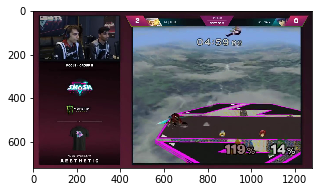

Prediction space_with_star
Actual space_with_star



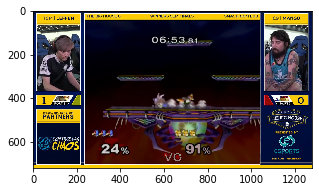

Prediction space
Actual space



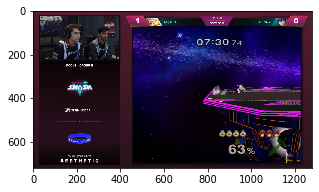

Prediction space_with_star
Actual space_with_star



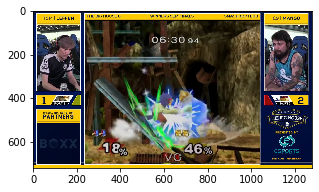

Prediction pokemon_gym
Actual pokemon_gym



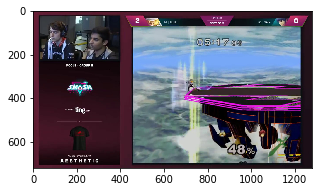

Prediction space_with_star
Actual space_with_star



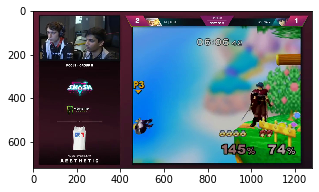

Prediction forest
Actual forest



In [52]:
# now print image with predictions
for n in range(6):
  i = random.randint(0,len(train_paths))
  image_path = train_paths[i]
  fig=plt.figure(figsize=(5, 5))
  plt.imshow(plt.imread(image_path))
  plt.show()
  # load an image off disk
  img = load_and_preprocess_image(image_path)
  im_batch = tf.expand_dims(img, 0) 
  # make predictions
  batch_pred = model.predict(im_batch) 
  pred = batch_pred[0] 
  print("Prediction", label_names[tf.argmax(pred)])
  print("Actual", label_names[train_labels[i]])
  print()

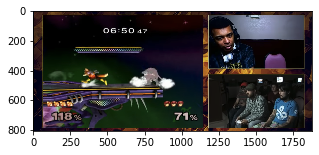

Prediction no_gaming



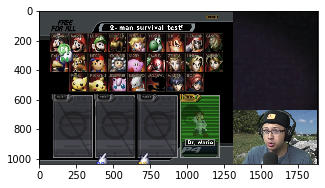

Prediction no_gaming



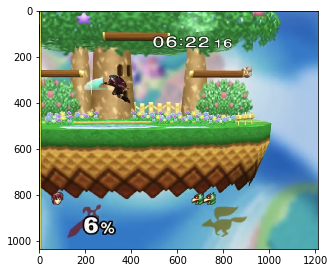

Prediction no_gaming



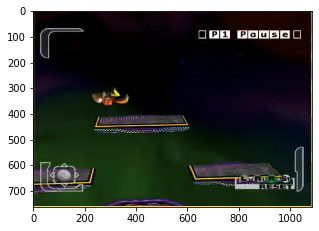

Prediction no_gaming



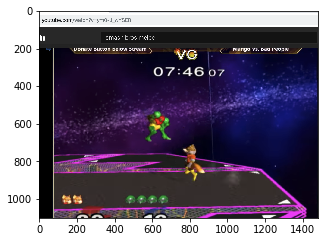

Prediction no_gaming



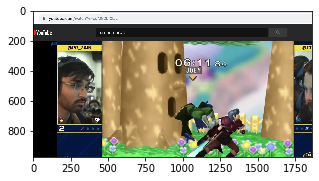

Prediction no_gaming



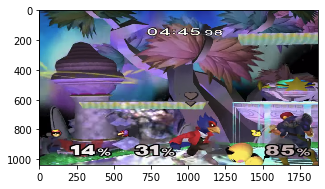

Prediction no_gaming



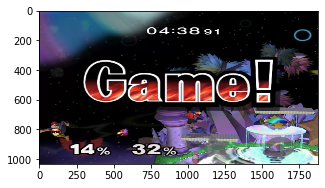

Prediction no_gaming



In [53]:
demo_root = pathlib.Path('/content/drive/My Drive/Smash_Bros_Master/demo_data/playground/')
all_image_paths = list(demo_root.glob('*'))
all_image_paths = [str(path) for path in all_image_paths if str(path).lower().endswith("png")]
for image_path in all_image_paths:
    fig=plt.figure(figsize=(5, 5))
    plt.imshow(plt.imread(image_path))
    plt.show()
    # load an image off disk
    img = load_and_preprocess_image(image_path)
    im_batch = tf.expand_dims(img, 0) 
    # make predictions
    batch_pred = model.predict(im_batch) 
    pred = batch_pred[0] 
    print("Prediction", label_names[tf.argmax(pred)])
    print()

In [63]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(6, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 190, 190, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 95, 95, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 93, 93, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 46, 46, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 135424)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                

In [64]:
data_root = pathlib.Path('/content/drive/My Drive/Smash_Bros_Master/_playground/')
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Example code:
# You should use the keras preprocessing utilities here instead of tf.data
# Here's an example of how to use them with the flowers dataset
# You will need to add data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   width_shift_range=0.5,
                                   height_shift_range=0.5,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        data_root,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=32,
        class_mode='sparse')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=test_ds)

Found 19600 images belonging to 6 classes.
data batch shape: (32, 192, 192, 3)
labels batch shape: (32,)
Epoch 1/10
100/100 [==============================] - 107s 1s/step - loss: 0.9917 - accuracy: 0.6178 - val_loss: 0.3575 - val_accuracy: 0.8882
Epoch 2/10
100/100 [==============================] - 104s 1s/step - loss: 0.4248 - accuracy: 0.8612 - val_loss: 0.1714 - val_accuracy: 0.9665
Epoch 3/10
100/100 [==============================] - 104s 1s/step - loss: 0.2990 - accuracy: 0.9061 - val_loss: 0.1402 - val_accuracy: 0.9659
Epoch 4/10
100/100 [==============================] - 105s 1s/step - loss: 0.2747 - accuracy: 0.9125 - val_loss: 0.1275 - val_accuracy: 0.9700
Epoch 5/10
100/100 [==============================] - 104s 1s/step - loss: 0.2466 - accuracy: 0.9244 - val_loss: 0.1053 - val_accuracy: 0.9727
Epoch 6/10
100/100 [==============================] - 104s 1s/step - loss: 0.2067 - accuracy: 0.9397 - val_loss: 0.2166 - val_accuracy: 0.9112
Epoch 7/10
100/100 [=================

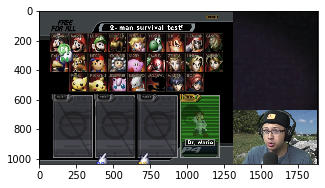

Prediction no_gaming



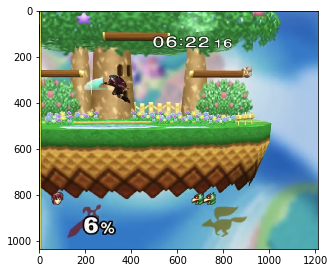

Prediction fountain_of_dream



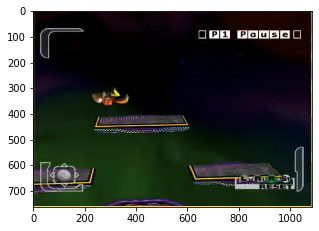

Prediction space



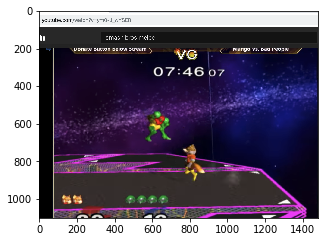

Prediction space_with_star



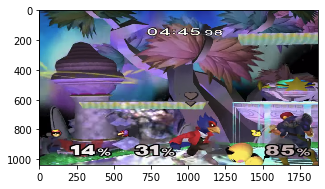

Prediction fountain_of_dream



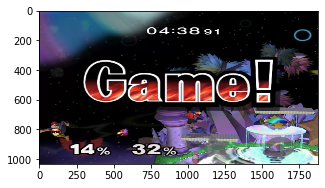

Prediction fountain_of_dream



In [77]:
demo_root = pathlib.Path('/content/drive/My Drive/Smash_Bros_Master/demo_data/playground/')
all_image_paths = list(demo_root.glob('*'))
all_image_paths = [str(path) for path in all_image_paths if str(path).lower().endswith("png")]
for image_path in all_image_paths:
    fig=plt.figure(figsize=(5, 5))
    plt.imshow(plt.imread(image_path))
    plt.show()
    # load an image off disk
    img = load_and_preprocess_image(image_path)
    im_batch = tf.expand_dims(img, 0) 
    # make predictions
    batch_pred = model.predict(im_batch) 
    pred = batch_pred[0] 
    print("Prediction", label_names[tf.argmax(pred)])
    print()

In [0]:
from google.colab import files
model.save("/content/playground_model.h5")
files.download("/content/playground_model.h5")